In [58]:
import pandas as pd

# where the data will be imported from
urls = 'https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/Seasons_Stats.csv'

data = {} # I'm creating a dictionary where all of my data can be stored in one place

# fill the dictionary
d = pd.read_csv(urls)
data['stats'] = d

# view first rows of data
data['stats'].head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### Problem. 
### As you can probably tell, the index field and the unnamed: 0 field are exactly the same. Because of this, we want to drop the unnamed: 0 field.

In [59]:
# inplace=True makes it so you change the current df
data['stats'].drop(data['stats'].columns[0], axis=1, inplace=True)

# view first rows of data
data['stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### Perfect! This looks great!
### Now we want to check for null rows.

In [60]:
# find the number of nulls
null_years = data['stats']['Year'].isnull().sum()
print(null_years)

# print the rows where year is null
data['stats'][data['stats']['Year'].isnull()]

67


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# drop the rows that have a null year
data['stats'].dropna(subset=['Year'], inplace=True)

# print the number of null rows to make sure it is zero
null_years = data['stats']['Year'].isnull().sum()
print(null_years)

0


In [62]:
# convert years to integers; cannot do this inplace
data['stats']['Year'] = data['stats']['Year'].astype('int64')
data['stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [63]:
# salary data only goes back to 1980 so do not need stats data before this
data['stats'] = data['stats'][data['stats']['Year'] > 1990]
data['stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10007,1991,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,...,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
10008,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,0.448,...,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0
10009,1991,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,0.551,...,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0
10010,1991,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,0.530,...,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0
10011,1991,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,0.526,...,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0


# START THE NEXT DATASET

In [64]:
# url for nba_salaries from 1991 to present
f = 'https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/nba_salaries.csv'

# read in csv file
d = pd.read_csv(f)
data['salaries'] = d

# look at first rows of dataframe
data['salaries'].head()

,Unnamed: 0,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll
0,0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000
1,1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000
2,2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000
3,3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000
4,4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000


In [66]:
d['Salary'] = d['Salary'].replace('[\$,]', '', regex=True).astype(float)

d['Total NBA Payroll'] = d['Total NBA Payroll'].replace('[\$,]', '', regex=True).astype(float)

# Clear out the entire 'Team Payroll' column
for rowNum in range(len(d.index.values)):
  d = d.set_value(rowNum, 'Team Payroll', 0)
  
for rowNum in range(len(d.index.values)):
  team = d.iloc[rowNum]['Team']
  previousEntry = d.iloc[rowNum-1]['Team'] # Keeping track of what the previous team name was
 
  if team != previousEntry: # Once it starts on a new team, add up every salary within it
    teamPayroll = d.iloc[rowNum]['Salary'] # Starting value 
    currentRow = rowNum # Example: we set current row to be row 1
    
    while True:
      nextEntry = d.iloc[currentRow+1]['Team'] # We check all of the following rows...
      
      if team != nextEntry: # Until the last instance of the particular team name because it changes to a different one
        d = d.set_value(rowNum, 'Team Payroll', teamPayroll)
        break
      teamPayroll += d.iloc[currentRow+1]['Salary']
      currentRow += 1 
      
  elif team == previousEntry: # If the team is the same as the previous, just copy the total payroll
      d = d.set_value(rowNum, 'Team Payroll', d.iloc[rowNum-1]['Team Payroll'])


C:\Users\ben.zwiener\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\ben.zwiener\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ben.zwiener\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


IndexError: single positional indexer is out-of-bounds

In [8]:
# inplace=True makes it so you change the current df
data['salaries'].drop(data['salaries'].columns[0], axis=1, inplace=True)

# view first rows of data
data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000


In [9]:
# find the number of nulls
null_years = data['salaries']['Year'].isnull().sum()
print(null_years)

# print the rows where year is null
data['salaries'][data['salaries']['Year'].isnull()]

0


,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll


### There are no null years. Perfect!

In [10]:
data['salaries']['Player Leverage'] = data['salaries']['Salary'] / data['salaries']['Team Payroll']

data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021


In [11]:
data['salaries']['League Weight'] = data['salaries']['Salary'] / data['salaries']['Total NBA Payroll']

data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725


In [12]:
data['salaries']['Team Market Size'] = data['salaries']['Team Payroll'] / data['salaries']['Total NBA Payroll']

data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196,0.040063
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034,0.040063
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280,0.040063
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049,0.040063
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725,0.040063


In [13]:
data['player_stats'] = pd.merge(data['stats'], data['salaries'], how='left', left_on=['Year', 'Player'], right_on=['Year', 'Player'])

data['player_stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size
0,1991,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,...,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,0.448,...,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205
2,1991,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,0.551,...,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657
3,1991,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,0.530,...,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205
4,1991,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,0.526,...,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977


In [14]:
# Creating dummy variables for Position first
positions = pd.get_dummies(data['player_stats']['Pos'])
positions.rename(columns={'PF' : 'PoF', 'SF' : 'SmF'}, inplace=True)
data['player_stats'] = pd.concat([data['player_stats'], positions], axis=1)

# Creating dummy variables for Team
team = pd.get_dummies(data['player_stats']['Team'])
data['player_stats'] = pd.concat([data['player_stats'], team], axis=1)

In [15]:
import seaborn as sns

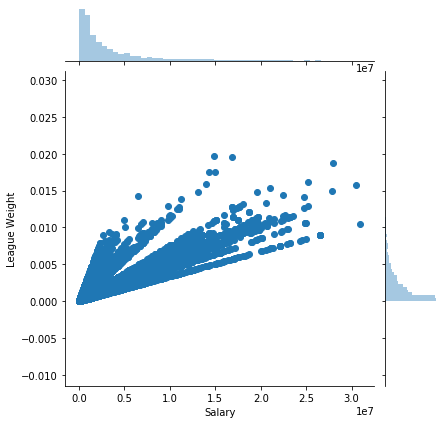

In [16]:
sns.jointplot(x='Salary', y='League Weight', data=data['player_stats'])

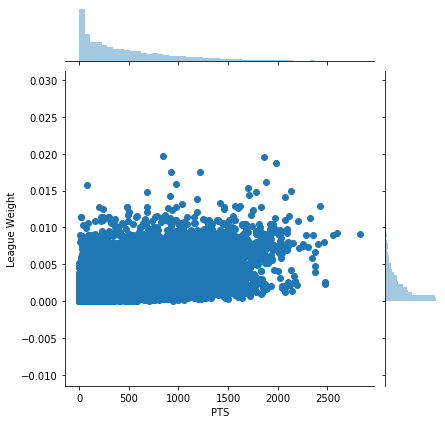

In [17]:
sns.jointplot(x='PTS', y='League Weight', data=data['player_stats'])

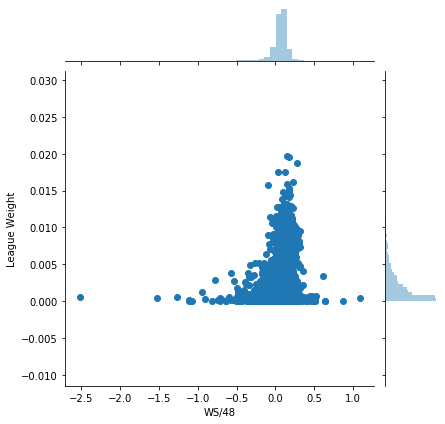

In [18]:
sns.jointplot(x='WS/48', y='League Weight', data=data['player_stats'])

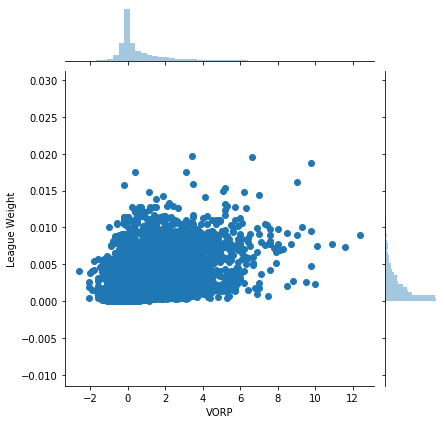

In [19]:
sns.jointplot(x='VORP', y='League Weight', data=data['player_stats'])

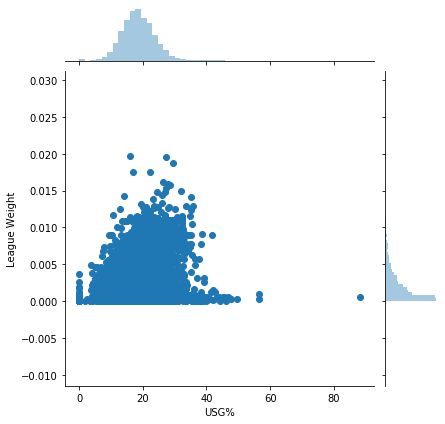

In [20]:
sns.jointplot(x='USG%', y='League Weight', data=data['player_stats'])

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

# The predictor variable is 'League Weight', and since League Weight is calculated from salary and the related variables, I'll remove the salary-related variables
data['player_stats']

colnames = list(data['player_stats']) 

colnames.remove('Player')
colnames.remove('Tm')
colnames.remove('Pos')
colnames.remove('Salary')
colnames.remove('League Weight')
colnames.remove('Total NBA Payroll')
colnames.remove('Team Payroll')
colnames.remove('Team')
colnames.remove('Player Leverage')
colnames.remove('blanl')
colnames.remove('blank2')

for name in colnames:
    print(name, type(data['player_stats'][name].isnull().sum()))
    if data['player_stats'][name].isnull().sum() > 0:
        colnames.remove(name)
        print('yep')

# Here we are trying to predict the league weight of the players

y = data['player_stats']['League Weight']
X = data['player_stats'][colnames]
np.nan_to_num(X)
np.nan_to_num(y)
print(colnames)

print(len(y))

#print(data['player_stats'][colnames[50:]].head(10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Year <class 'numpy.int64'>
Age <class 'numpy.int64'>
G <class 'numpy.int64'>
GS <class 'numpy.int64'>
MP <class 'numpy.int64'>
PER <class 'numpy.int64'>
yep
3PAr <class 'numpy.int64'>
yep
ORB% <class 'numpy.int64'>
yep
TRB% <class 'numpy.int64'>
yep
STL% <class 'numpy.int64'>
yep
TOV% <class 'numpy.int64'>
yep
OWS <class 'numpy.int64'>
DWS <class 'numpy.int64'>
WS <class 'numpy.int64'>
WS/48 <class 'numpy.int64'>
yep
DBPM <class 'numpy.int64'>
BPM <class 'numpy.int64'>
VORP <class 'numpy.int64'>
FG <class 'numpy.int64'>
FGA <class 'numpy.int64'>
FG% <class 'numpy.int64'>
yep
3PA <class 'numpy.int64'>
3P% <class 'numpy.int64'>
yep
2PA <class 'numpy.int64'>
2P% <class 'numpy.int64'>
yep
FT <class 'numpy.int64'>
FTA <class 'numpy.int64'>
FT% <class 'numpy.int64'>
yep
DRB <class 'numpy.int64'>
TRB <class 'numpy.int64'>
AST <class 'numpy.int64'>
STL <class 'numpy.int64'>
BLK <class 'numpy.int64'>
TOV <class 'numpy.int64'>
PF <class 'numpy.int64'>
PTS <class 'numpy.int64'>
Team Market Size <

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').